In [74]:
from bs4 import BeautifulSoup
import requests

In [75]:
code = '005930' # 삼성전자 코드
url = f'https://finance.naver.com/item/sise_day.naver?code={code}'
req = requests.get(url, headers={'User-agent': 'Mozilla/5.0'})
html = BeautifulSoup(req.text, "lxml")

In [76]:
pgrr = html.find('td', {'class':'pgRR'})
print(pgrr.a['href'])

/item/sise_day.naver?code=005930&page=687


In [77]:
s = pgrr.a['href'].split('=')
s

['/item/sise_day.naver?code', '005930&page', '687']

In [78]:
# last_page = s[-1]

In [79]:
import pandas as pd
code = '005930'
headers={'User-agent': 'Mozilla/5.0'}
url = f'https://finance.naver.com/item/sise_day.naver?code={code}'
df = None

for page in range(1, 30):
    req = requests.get(f'{url}&page={page}', headers=headers)
    df = pd.concat([df, pd.read_html(req.text, encoding='euc-kr')[0]], ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17948\3341932139.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df, pd.read_html(req.text, encoding='euc-kr')[0]], ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17948\3341932139.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df, pd.read_html(req.text, encoding='euc-kr')[0]], ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17948\3341932139.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.concat([df, pd.read_html(req.text, encoding='euc-kr')[0]], ignore_index=True)
C:\Users\admin\AppData\Local

In [80]:
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df['날짜'] = pd.to_datetime(df['날짜'])

In [81]:
df.index = pd.DatetimeIndex(df['날짜'])

In [82]:
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})

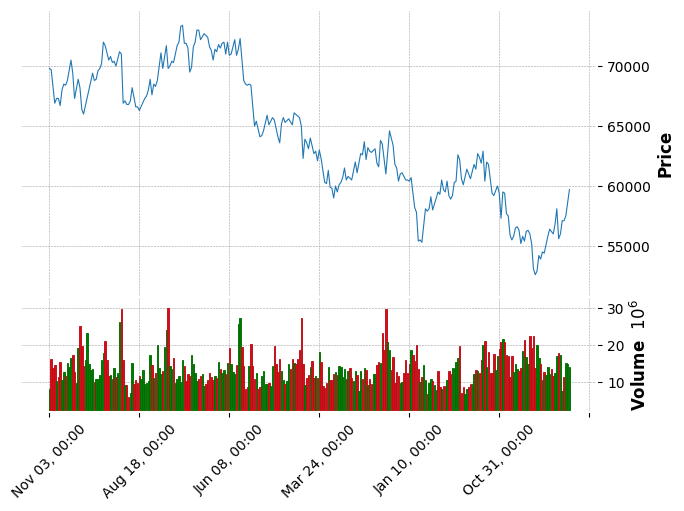

In [87]:
import mplfinance as mpf

# mpf.plot(df, title = 'Samsung', type='candle' )
# mpf.plot(df, title = 'Samsung', type='line')
mpf.plot(df, type='line', style='charles', volume=True)

In [84]:

# plt.figure(figsize=(15, 5))
# plt.xticks([10, 20, 30, 40 ,50 ,60]rotation = 45)


# plt.plot(df['날짜'], df['종가'], linewidth = 3)
# # t2 = plt.plot(df['거래량'], type='candle', style='charles', volume=True)



# plt.show()

In [85]:
# df.to_excel('C:\sqlite\mysql\code\AI\clol\주식.xlsx', index=False)